In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
cluster_idx=pd.read_csv('review_cluster.csv')


In [7]:
review = pd.read_csv('df_for_cbs.csv')
review['nva']=review['nva'].apply(literal_eval)

In [8]:
review['cluster']=cluster_idx['cluster']
review['len']=cluster_idx['len']

In [9]:
cluster1=review[review['cluster']==1]
cluster2=review[review['cluster']==2]

# Questions

1. 평균 리뷰 길이 수는?
2. 주요 부여 평점은?
3. 주로 구매하는 브랜드/대제품/소제품 군은?
4. 표현력은? 1 ( exCBS의 4요소 (2) expressitivity )
5. 표현력은? 2 ( 사용한 token의 절대적인 개수 )

In [10]:
cluster1.len.describe()

count    45129.000000
mean       113.963549
std         38.050950
min          9.000000
25%         90.000000
50%        124.000000
75%        136.000000
max        187.000000
Name: len, dtype: float64

In [11]:
cluster2.len.describe()

count    5054.000000
mean      281.068263
std       126.667616
min       188.000000
25%       205.000000
50%       232.000000
75%       301.000000
max       804.000000
Name: len, dtype: float64

In [12]:
cluster1.rating.describe()

count    45129.000000
mean         4.666955
std          0.795756
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [13]:
cluster2.rating.describe()

count    5054.000000
mean        4.643649
std         0.862988
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [14]:
cluster1['brand'].value_counts()/cluster1['brand'].shape[0]

hanyul       0.208203
primera      0.196437
mamonde      0.178222
hera         0.150701
sulhwasoo    0.092801
iope         0.079372
laneige      0.064327
amore        0.029936
Name: brand, dtype: float64

In [15]:
cluster2['brand'].value_counts()/cluster2['brand'].shape[0]

hera         0.191531
hanyul       0.158488
primera      0.152750
mamonde      0.145034
iope         0.117729
sulhwasoo    0.105461
laneige      0.075979
amore        0.053027
Name: brand, dtype: float64

In [16]:
cluster1['big_category'].value_counts()/cluster1['big_category'].shape[0]

catA    0.730351
catC    0.157548
catE    0.065590
catD    0.028806
catB    0.017705
Name: big_category, dtype: float64

In [17]:
cluster2['big_category'].value_counts()/cluster2['big_category'].shape[0]

catA    0.719034
catC    0.194499
catE    0.037792
catB    0.032845
catD    0.015829
Name: big_category, dtype: float64

In [18]:
cluster1['small_category'].value_counts()/cluster1['small_category'].shape[0]

cat2                 0.580647
cat5                 0.157548
cat1                 0.088613
cat3                 0.061092
cat9                 0.057879
cat6                 0.028208
cat4                 0.017705
cat10                0.007711
cat7                 0.000532
[#BFF] 아이 팔레트 11g    0.000066
Name: small_category, dtype: float64

In [19]:
cluster2['small_category'].value_counts()/cluster2['small_category'].shape[0]

cat2     0.561733
cat5     0.194499
cat1     0.088643
cat3     0.068658
cat4     0.032845
cat9     0.031856
cat6     0.015829
cat10    0.005936
Name: small_category, dtype: float64

In [20]:
cluster1.expressivity.describe()

count    45129.000000
mean         0.990308
std          0.013327
min          0.888889
25%          0.982456
50%          1.000000
75%          1.000000
max          1.000000
Name: expressivity, dtype: float64

In [21]:
cluster2.expressivity.describe()

count    5054.000000
mean        0.982839
std         0.012380
min         0.930693
25%         0.974790
50%         0.985559
75%         0.989899
max         1.000000
Name: expressivity, dtype: float64

In [22]:
#set(cluster1.nva[0])

In [25]:
cluster1_tokens=cluster1.nva.apply(lambda x:len(set(x)))
cluster2_tokens=cluster2.nva.apply(lambda x:len(set(x)))

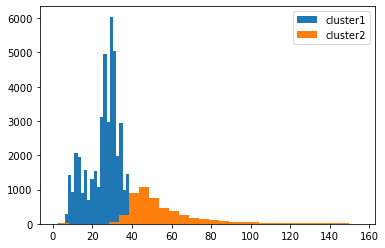

In [36]:
import matplotlib.pyplot as plt
plt.hist(cluster1_tokens,bins=30,label='cluster1')
plt.hist(cluster2_tokens,bins=30,label='cluster2')
plt.legend()

In [37]:
cluster1_tokens.describe()

count    45129.000000
mean        25.883955
std          8.428747
min          1.000000
25%         21.000000
50%         28.000000
75%         32.000000
max         50.000000
Name: nva, dtype: float64

In [38]:
cluster2_tokens.describe()

count    5054.000000
mean       56.500594
std        20.938005
min         3.000000
25%        44.000000
50%        50.000000
75%        62.000000
max       155.000000
Name: nva, dtype: float64